In [1]:
import numpy as np
import pandas as pd
import main
import seaborn as sns
data_for_analize = pd.read_csv(main.data_dir + '\\data_for_analize.csv', delimiter=';')
data_for_analize.head()

,UWI,aps,kgl,kng,kno,kp,kpr,kvo,rp,satur,well_name,date_start,wc,X-Coord,Y-Coord
0,314_342,0.687039,0.117067,0.053140,0.611152,0.197540,45.104132,0.388848,5.520386,2.542700,554,01.06.2008,0.08,351657.56,6464689.29
1,314_246,0.730486,0.115063,0.101729,0.478072,0.164370,8.436575,0.521928,6.312685,2.718816,458,01.01.2016,0.42,349776.29,6463659.09
2,314_381,0.687716,0.122134,0.187884,0.569034,0.176849,31.133190,0.430966,6.323276,3.887931,593,01.04.2010,0.25,351543.76,6464555.85
3,314_328,0.607397,0.138881,0.158237,0.529251,0.134452,2.732420,0.470749,6.518721,3.753425,530,01.08.2009,0.20,352508.25,6467232.79
4,314_360,0.729539,0.116272,0.121862,0.587687,0.161848,20.141014,0.412313,6.454378,3.354839,572,01.08.2010,0.36,349941.96,6464113.27


In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

In [7]:
data_for_analize[data_for_analize['well_name'] == 543]

,UWI,aps,kgl,kng,kno,kp,kpr,kvo,rp,satur,well_name,date_start,wc,X-Coord,Y-Coord
104,314_331,0.811149,0.111977,0.590575,0.62146,0.146069,5.009195,0.37854,14.74023,7.724138,543,01.07.2008,0.01,351634.45,6464661.72


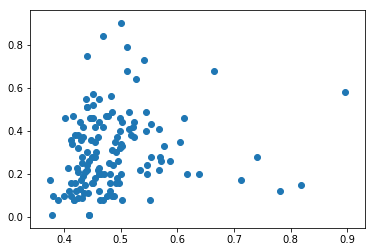

In [8]:
# зависимость обводненности от нефтенасыщенности 
import numpy as np
x_coord = data_for_analize['kvo']
y_coord = data_for_analize['wc']
plt.scatter(x_coord, y_coord)

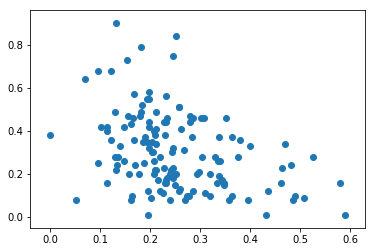

In [9]:
# зависимость обводненности от нефтенасыщенности 
x_coord = data_for_analize['kng']
y_coord = data_for_analize['wc']
plt.scatter(x_coord, y_coord)

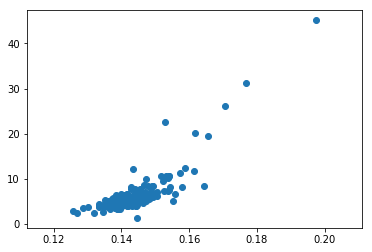

In [10]:
# зависимость пористости от проницаемости 
x_coord = data_for_analize['kp']
y_coord = data_for_analize['kpr']
plt.scatter(x_coord, y_coord)

In [20]:
y = data_for_analize['wc']
y_r = int(10) * round(y,1)
y_r = []
for val in y:
    y_r.append(int(10*val))

In [21]:
data_for_analize_scale = data_for_analize.copy() 
data_for_analize_scale['wc']=y_r

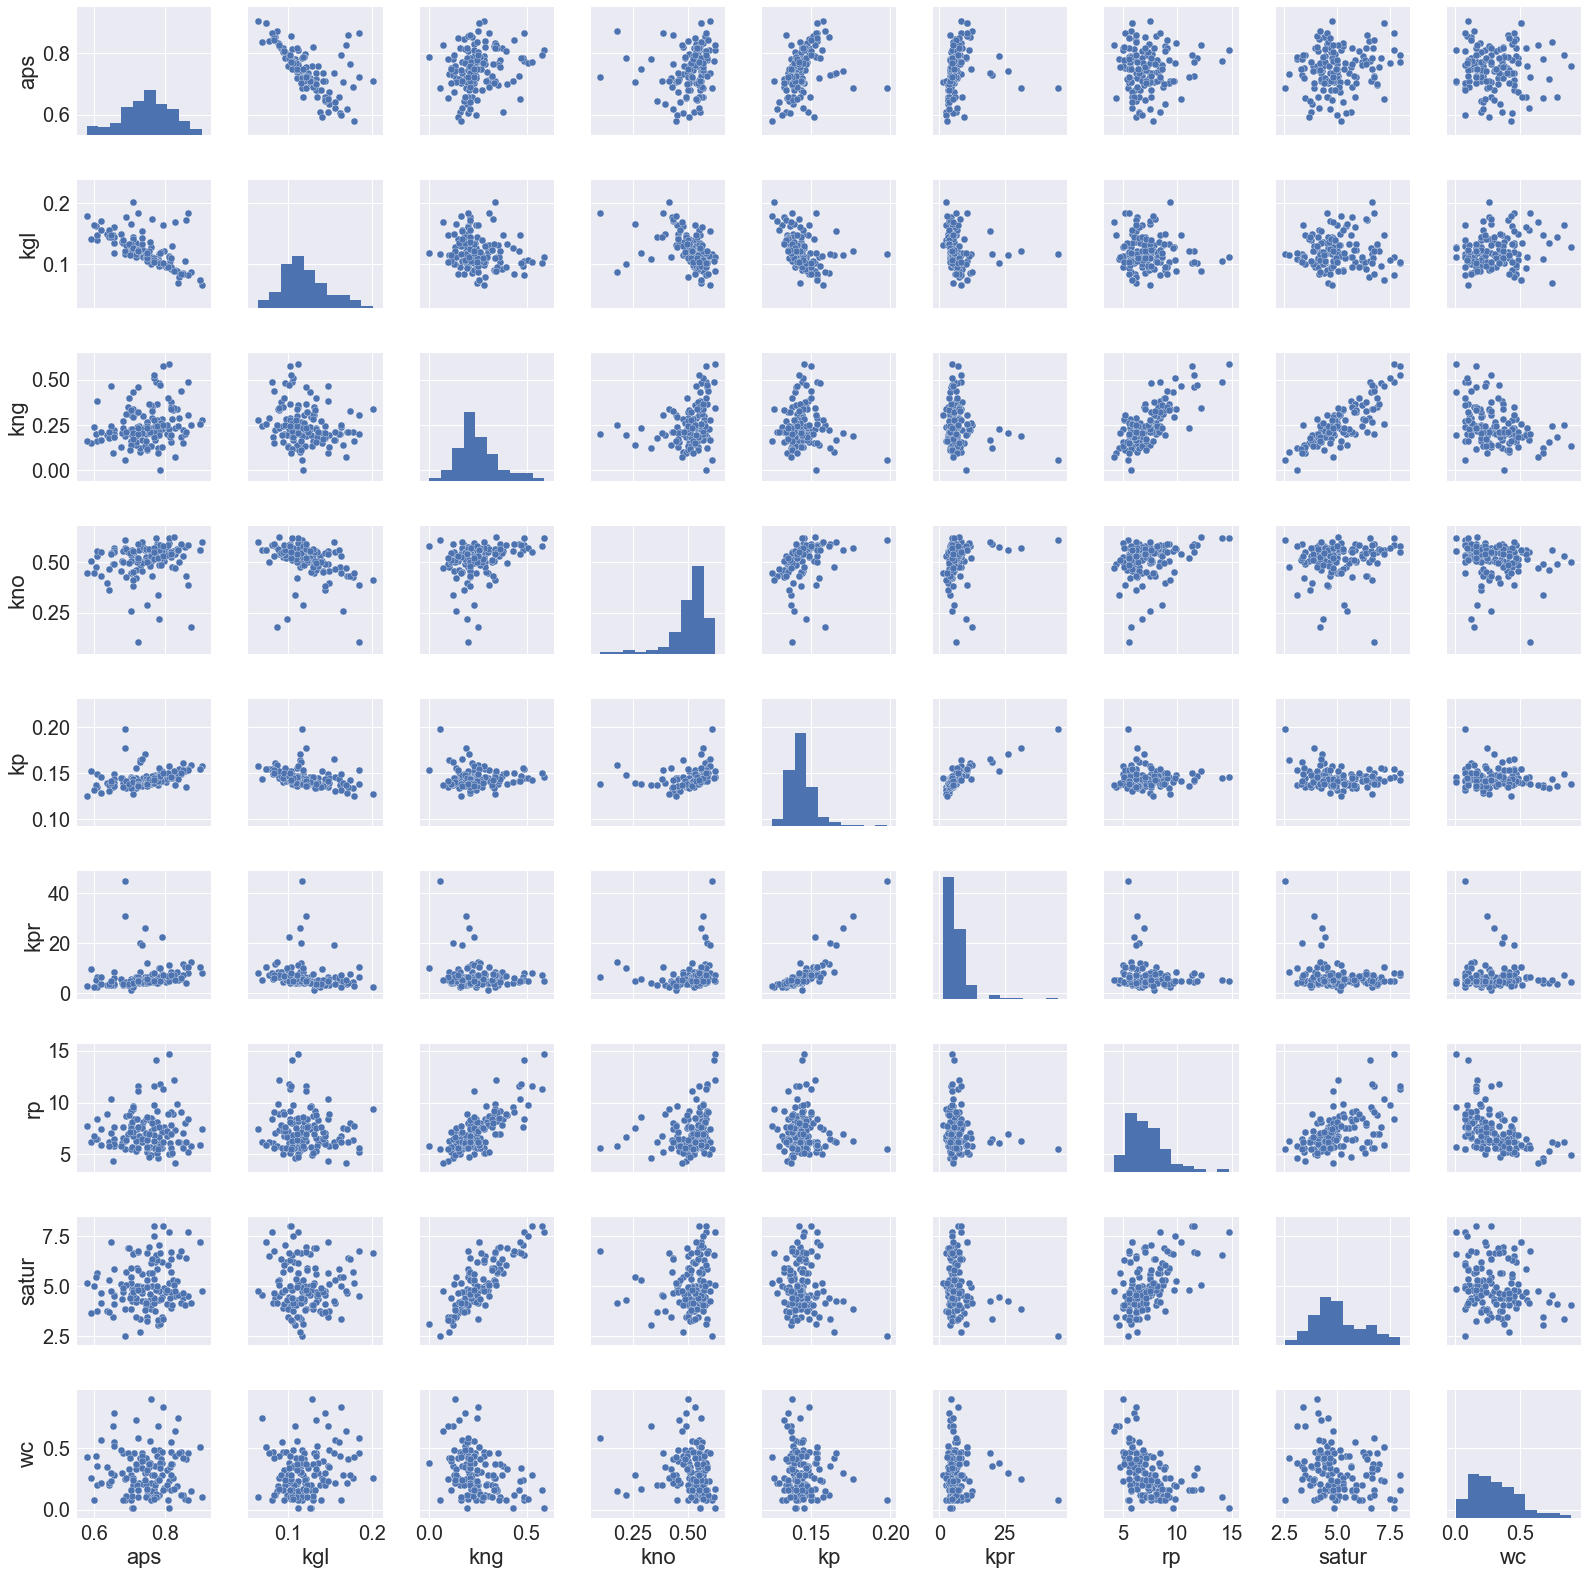

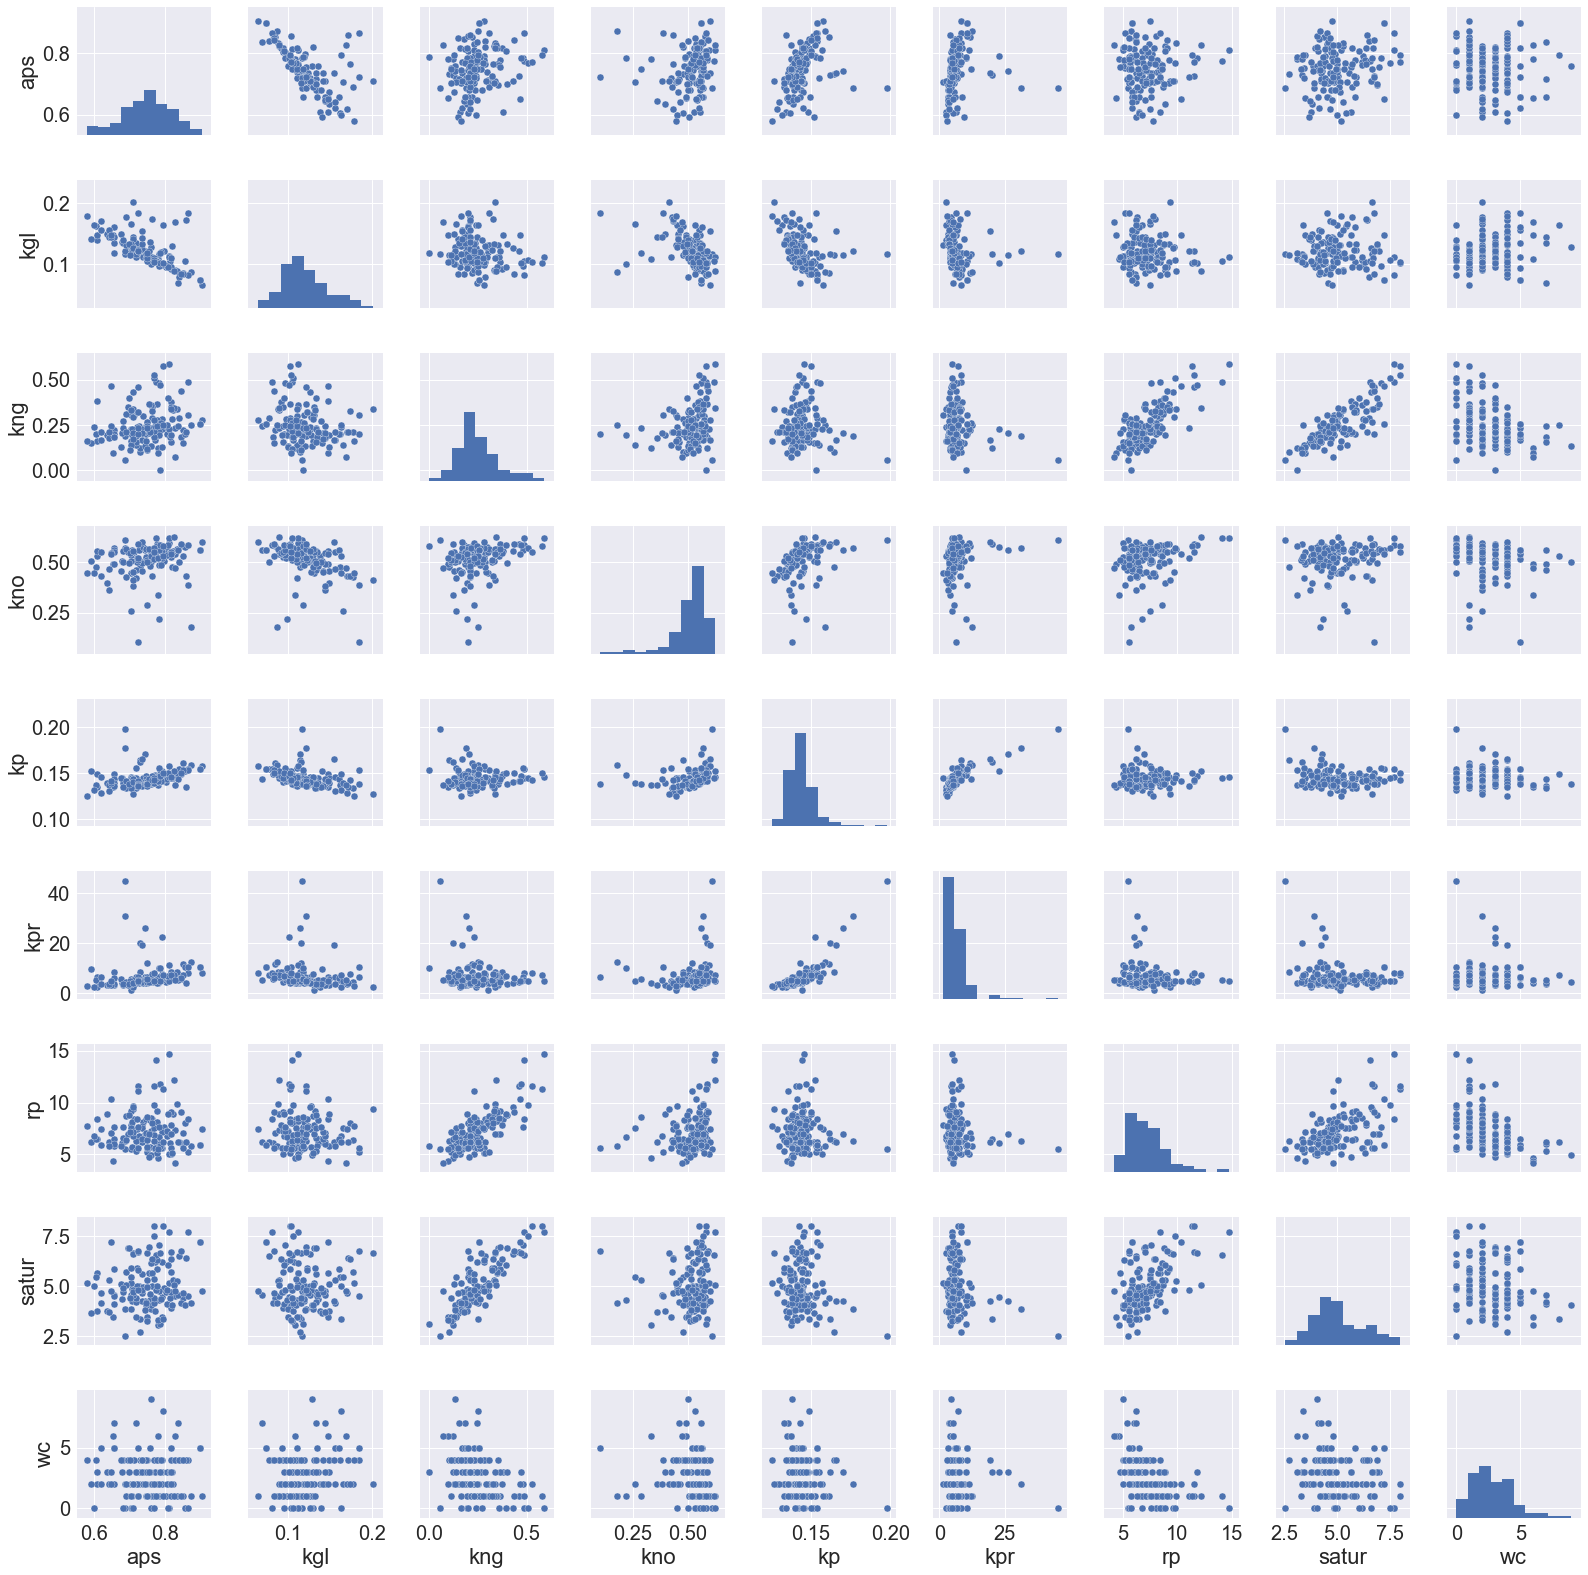

In [22]:
cols = ['aps', 'kgl', 'kng', 'kno', 'kp', 'kpr', 'rp', 'satur', 'wc']
sns.set(font_scale=2.0)
sns_plot = sns.pairplot(data_for_analize[cols])
sns_plot.savefig(main.data_dir + '\\pairplot_original.png')
sns_plot = sns.pairplot(data_for_analize_scale[cols])
sns_plot.savefig(main.data_dir + '\\pairplot_scale.png')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000003F1F8B8CC0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000003F203F1668>]], dtype=object)

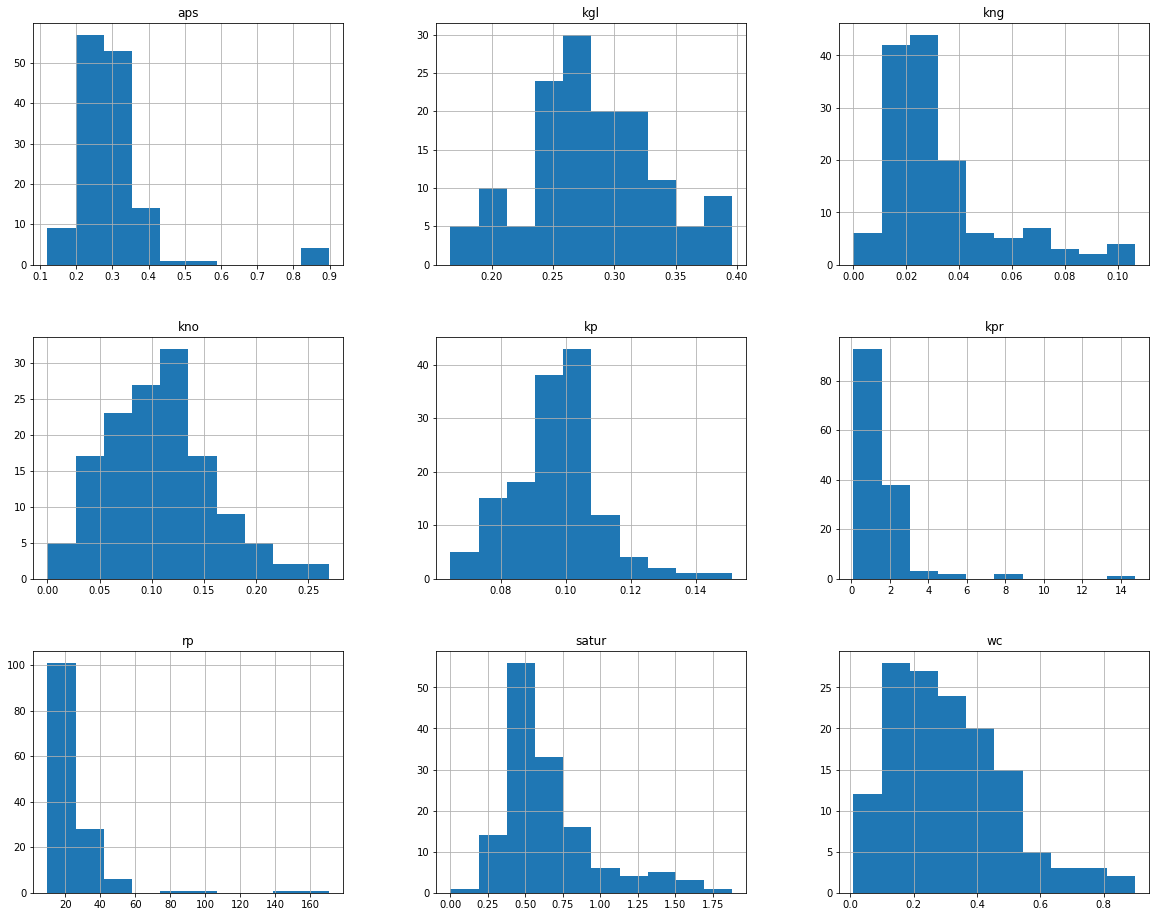

In [94]:
#fig, ax = plt.subplots()
#hist_data = data_for_analize[cols].hist(figsize=(800,800), ax=ax);
#fig.savefig(main.data_dir + '\\hist.png')
hist_data = data_for_analize[cols].hist(figsize=(20,16));
hist_data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000003F27DCD080>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000003F20AC33C8>]], dtype=object)

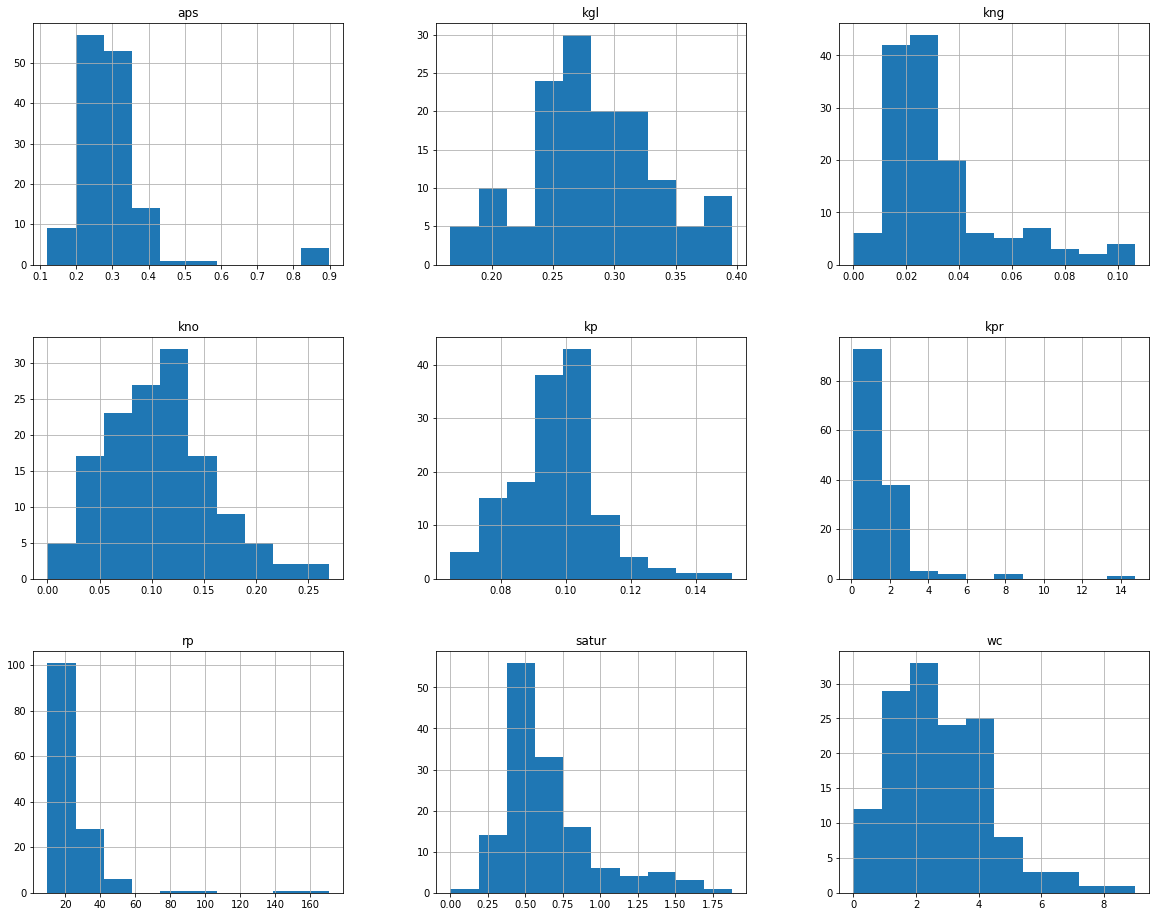

In [95]:
hist_data = data_for_analize_scale[cols].hist(figsize=(20,16));
hist_data

In [30]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [31]:
data_for_analize.columns
# преобразуем все признаки в числовые, выкинув штаты
X = data_for_analize.drop(['UWI', 'well_name', 'date_start', 'X-Coord', 'Y-Coord'], axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
X_scaled

array([[-0.90654087, -0.13261953, -1.85263243, ..., -0.9516851 ,
        -2.14332242, -1.25984454],
       [-0.27107356, -0.20972444, -1.39425526, ..., -0.51424852,
        -1.9926662 ,  0.64699113],
       [-0.89663979,  0.06229565, -0.58149471, ..., -0.50840119,
        -0.99256349, -0.3064267 ],
       ..., 
       [-1.46071584,  1.06648839,  2.02413082, ...,  1.69658663,
         1.86981985, -0.41859351],
       [ 1.15029022,  1.88605308, -1.69753252, ..., -1.68528449,
        -0.22030466,  1.88082597],
       [ 0.30917729, -0.6286631 ,  2.61256517, ...,  2.3909105 ,
         2.52504721, -0.1381765 ]])

In [27]:
%%time
tsne = TSNE(random_state=17)
tsne_representation = tsne.fit_transform(X_scaled)

Wall time: 2.62 s


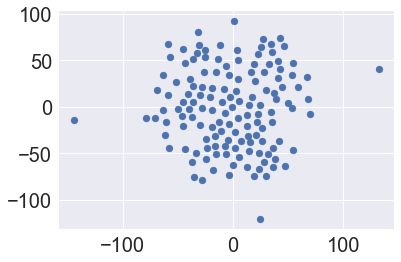

In [28]:
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1]);

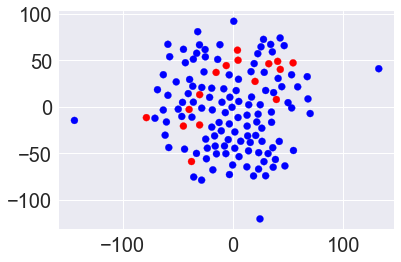

In [32]:
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1], c=data_for_analize_scale['wc'].map({0: 'blue', 1:'blue', 2:'blue', 3:'blue', 4:'blue',
                                                                                                      5: 'red', 6:'red', 7:'red', 8:'red', 9:'red'}));

In [33]:
data_for_analize_time = data_for_analize_scale.copy()
data_for_analize_time['date_start'] =  pd.to_datetime(data_for_analize_time['date_start'])
# date = data_for_analize_time['date_start']
# date_transform = []
# for d in date:
#     date_transform.append(d.astype(object).year * d.astype(object).mohtn + d.astype(object).day)
# date_transform
data_for_analize_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 15 columns):
UWI           138 non-null object
aps           138 non-null float64
kgl           138 non-null float64
kng           138 non-null float64
kno           138 non-null float64
kp            138 non-null float64
kpr           138 non-null float64
kvo           138 non-null float64
rp            138 non-null float64
satur         138 non-null float64
well_name     138 non-null int64
date_start    138 non-null datetime64[ns]
wc            138 non-null int64
X-Coord       138 non-null float64
Y-Coord       138 non-null float64
dtypes: datetime64[ns](1), float64(11), int64(2), object(1)
memory usage: 16.2+ KB


In [34]:
data_for_analize_time.columns
# преобразуем все признаки в числовые
X = data_for_analize_time.drop(['UWI', 'aps', 'kgl', 'kng', 'kno', 'kp', 'kpr', 'rp', 'satur',
       'well_name'], axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X.head(1)

TypeError: float() argument must be a string or a number, not 'Timestamp'

In [139]:
%%time
tsne = TSNE(random_state=17)
tsne_representation = tsne.fit_transform(X_scaled)

Wall time: 1.62 s


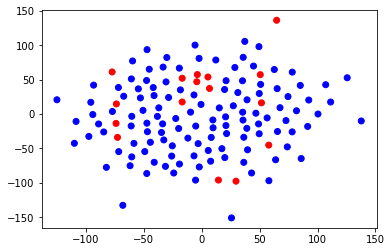

In [143]:
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1], c=data_for_analize_time['wc'].map({0: 'blue', 1:'blue', 2:'blue', 3:'blue', 4:'blue',
                                                                                                      5: 'red', 6:'red', 7:'red', 8:'red', 9:'red'}));